In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import math as math
from IPython import display
import gc
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 20

In [2]:
from matplotlib.ticker import FuncFormatter
# ##########################################################
# Format tick labels using their exponent only... 
# ##########################################################
def formatter(x,pos):
    return format(np.log10(x), '.0f')

In [3]:
m09t1 = np.loadtxt("/Users/earnric/Dropbox/Sarmento-Paper/TauFitData/t1M0.9.txt",skiprows=1)
m09t2 = np.loadtxt("/Users/earnric/Dropbox/Sarmento-Paper/TauFitData/t2M0.9.txt",skiprows=1)
m21t1 = np.loadtxt("/Users/earnric/Dropbox/Sarmento-Paper/TauFitData/t1M2.1.txt",skiprows=1)
m21t2 = np.loadtxt("/Users/earnric/Dropbox/Sarmento-Paper/TauFitData/t2M2.1.txt",skiprows=1)
m35t1 = np.loadtxt("/Users/earnric/Dropbox/Sarmento-Paper/TauFitData/t1M3.5.txt",skiprows=1)
m35t2 = np.loadtxt("/Users/earnric/Dropbox/Sarmento-Paper/TauFitData/t2M3.5.txt",skiprows=1)
m62t1 = np.loadtxt("/Users/earnric/Dropbox/Sarmento-Paper/TauFitData/t1M6.2.txt",skiprows=1)
m62t2 = np.loadtxt("/Users/earnric/Dropbox/Sarmento-Paper/TauFitData/t2M6.2.txt",skiprows=1)


In [20]:
Zcrit = 1e-5
def tau1(Z,m):
    return (0.225 - 0.055 * math.exp(-m**(3./2.)/4.)) * math.sqrt(-math.log10(1e-7 * Z/Zcrit)/math.log10(Z/Zcrit)/5.0 + 1.0)

def tau2(Z,m):
    return (0.335 - 0.095 * math.exp(-m**(2.)/4.)) * math.sqrt(-math.log10(1e-7 * Z/Zcrit)/math.log10(Z/Zcrit)/3.0 + 1.0)

tau1v = np.vectorize(tau1) # convert to a func that can deal with numpy vectors/arrays
tau2v = np.vectorize(tau2)

In [14]:
zrange=np.linspace(0.1,8.0,80) # See mathematica nb
zrange[0:5]

array([ 0.1,  0.2,  0.3,  0.4,  0.5])

In [26]:
tau1(10**-5,2.1)

ZeroDivisionError: float division by zero

In [16]:
tau1(1,2.1)/tau1(1,2.1)

1.0

/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


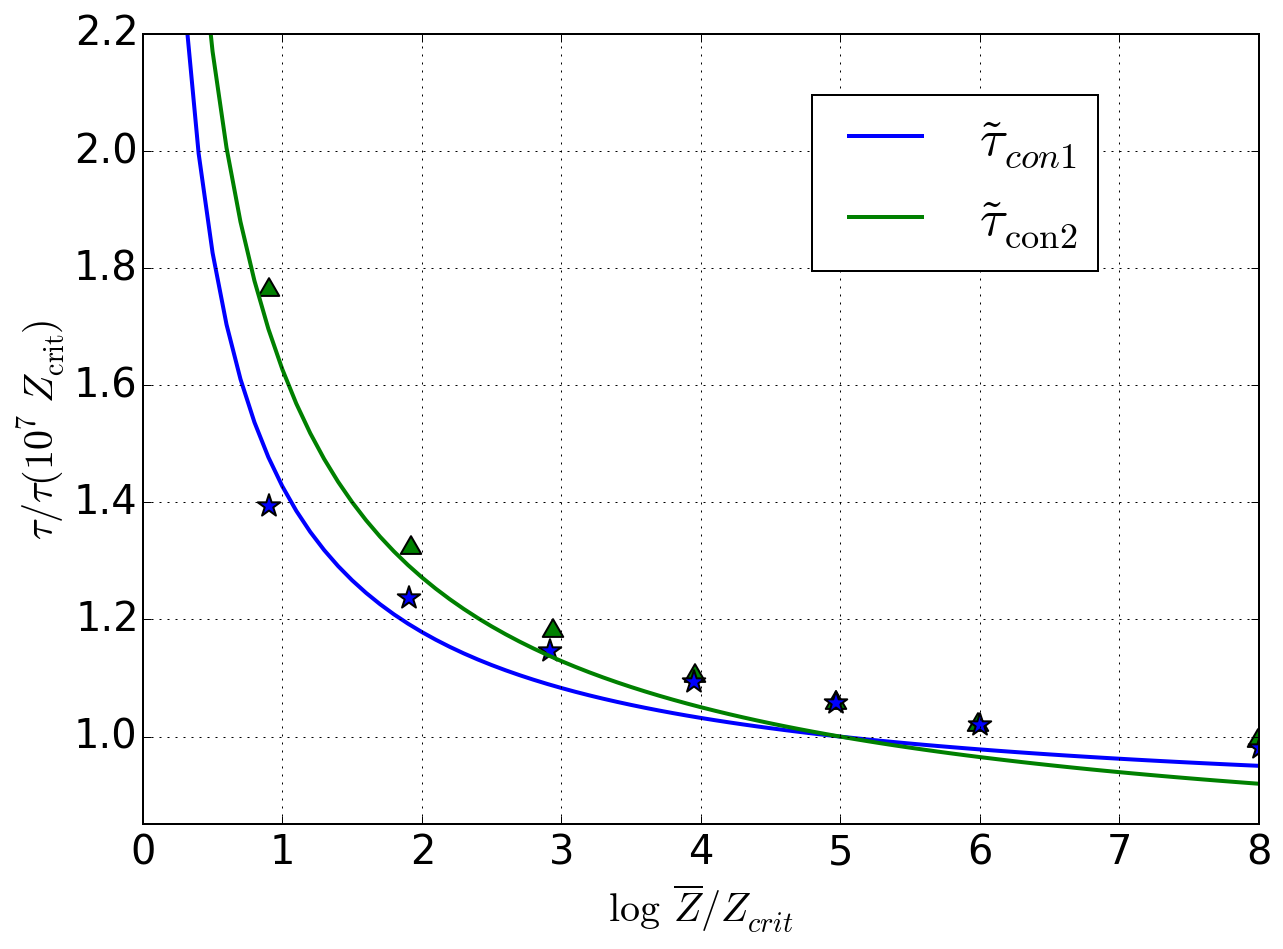

In [22]:
Zcrit = 1e-5

yt1m09=tau1v(10**zrange*Zcrit,0.9)/tau1v(1,0.9)
yt2m09=tau2v(10**zrange*Zcrit,0.9)/tau2v(1,0.9)
yt1m21=tau1v(10**zrange*Zcrit,2.1)/tau1v(1,2.1)
yt2m21=tau2v(10**zrange*Zcrit,2.1)/tau2v(1,2.1)
yt1m35=tau1v(10**zrange*Zcrit,3.5)/tau1v(1,3.5)
yt2m35=tau2v(10**zrange*Zcrit,3.5)/tau2v(1,3.5)
yt1m62=tau1v(10**zrange*Zcrit,6.2)/tau1v(1,6.2)
yt2m62=tau2v(10**zrange*Zcrit,6.2)/tau2v(1,6.2)

tauPlots = plt.axes()
tauPlots.set_aspect(4.2)
tauPlots.scatter(m21t2[:,0],m21t2[:,1],s=140, c="g",marker=(3,1))
tauPlots.scatter(m21t1[:,0],m21t1[:,1],s=140, c="b",marker='*')
tauPlots.plot(zrange,yt1m21,lw=2)
tauPlots.plot(zrange,yt2m21,lw=2)
tauPlots.grid()
tauPlots.axes.set_ylim([0.85,2.2])
tauPlots.axes.set_xlim([0.0,8.0])
tauPlots.set_xlabel(r"${\rm log}\, \overline{Z}/Z_{crit}$")
tauPlots.set_ylabel(r'$\tau/\tau(10^7 Z_{\rm{crit}})$')
tauPlots.legend([r'$\tilde \tau_{con1}$',r'$\tilde \tau_{\rm{con2}}$'],loc=(0.6,0.7), fontsize=26 )

#plt.savefig("tauPlot.pdf",bbox_inches='tight')

/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


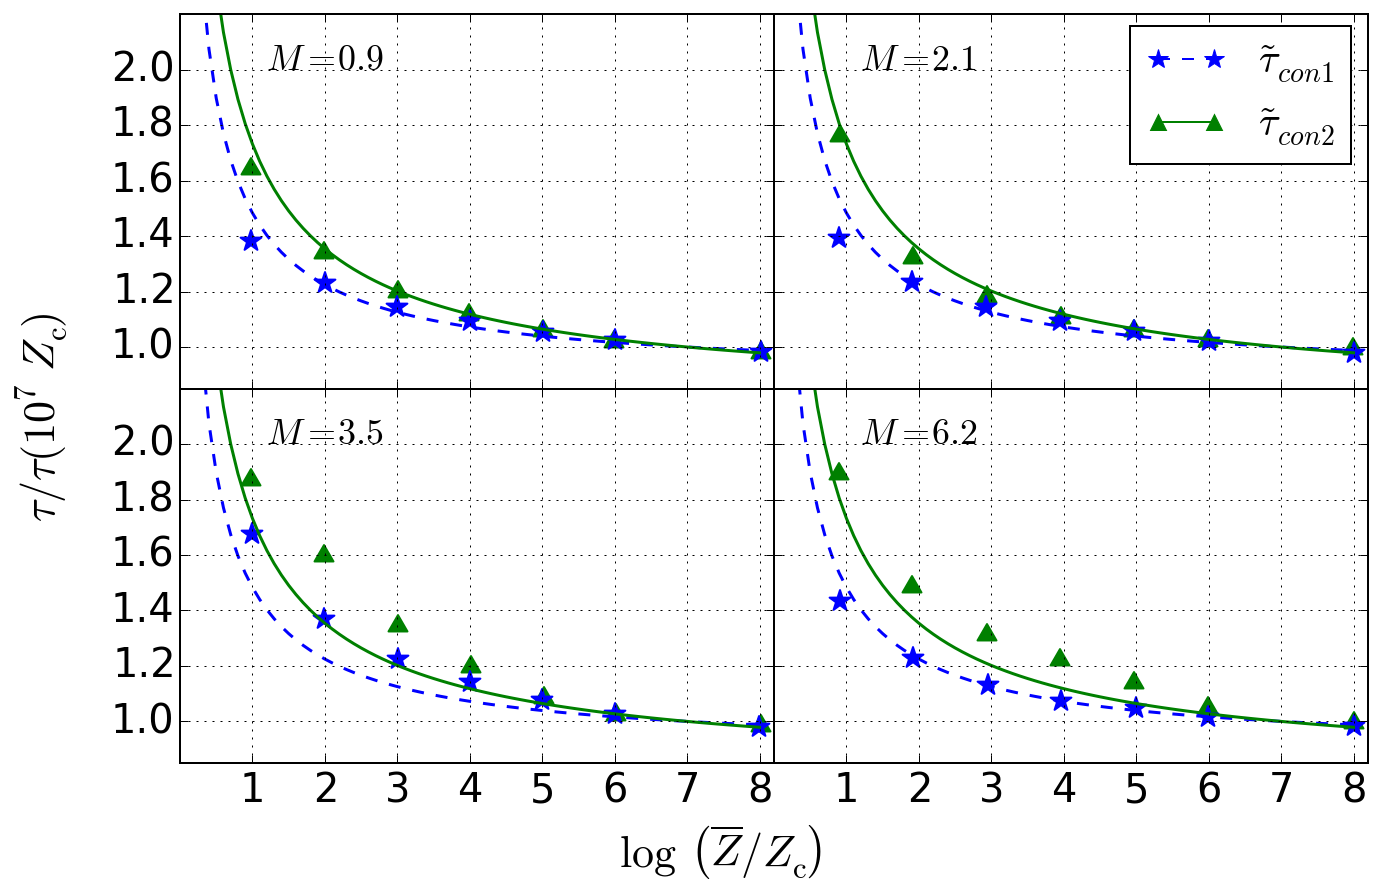

In [19]:
Zcrit = 1e-7

yt1m09=tau1v(10**zrange*Zcrit,0.9)/tau1v(1,0.9)
yt2m09=tau2v(10**zrange*Zcrit,0.9)/tau2v(1,0.9)
yt1m21=tau1v(10**zrange*Zcrit,2.1)/tau1v(1,2.1)
yt2m21=tau2v(10**zrange*Zcrit,2.1)/tau2v(1,2.1)
yt1m35=tau1v(10**zrange*Zcrit,3.5)/tau1v(1,3.5)
yt2m35=tau2v(10**zrange*Zcrit,3.5)/tau2v(1,3.5)
yt1m62=tau1v(10**zrange*Zcrit,6.2)/tau1v(1,6.2)
yt2m62=tau2v(10**zrange*Zcrit,6.2)/tau2v(1,6.2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

ytics = [1.0,1.3,1.7,2.0]
ytics = [1.0,1.2,1.4,1.6,1.8,2.0]
xtics = [1,2,3,4,5,6,7,8]
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp((ax1, ax2, ax3, ax4), xticks=xtics, #xticklabels=['a', 'b', 'c'],
        yticks=ytics)

plt.setp([a.axes.set_ylim([0.85,2.2]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.axes.set_xlim([0.,8.2]) for a in [ax1,ax2,ax3,ax4]])

ax1.scatter(m09t2[:,0],m09t2[:,1],s=120, c="g",marker=(3,1), edgecolor='g')
ax1.scatter(m09t1[:,0],m09t1[:,1],s=120, c="b",marker='*', edgecolor='b')
ax1.plot(zrange,yt1m09,lw=1.5,ls='--')
ax1.plot(zrange,yt2m09,lw=1.5)
ax1.grid()

ax2.scatter(m21t2[:,0],m21t2[:,1],s=120, c="g",marker=(3,1), edgecolor='g')
ax2.scatter(m21t1[:,0],m21t1[:,1],s=120, c="b",marker='*', edgecolor='b')
ax2.plot(zrange,yt1m21,lw=1.5,ls='--')
ax2.plot(zrange,yt2m21,lw=1.5)
ax2.grid()

ax3.scatter(m35t2[:,0],m35t2[:,1],s=120, c="g",marker=(3,1), edgecolor='g')
ax3.scatter(m35t1[:,0],m35t1[:,1],s=120, c="b",marker='*', edgecolor='b')
ax3.plot(zrange,yt1m35,lw=1.5,ls='--')
ax3.plot(zrange,yt2m35,lw=1.5)
ax3.grid()

ax4.scatter(m62t2[:,0],m62t2[:,1],s=120, c="g",marker=(3,1), edgecolor='g')
ax4.scatter(m62t1[:,0],m62t1[:,1],s=120, c="b",marker='*', edgecolor='b')
ax4.plot(zrange,yt1m62,lw=1.5,ls='--')
ax4.plot(zrange,yt2m62,lw=1.5)
ax4.grid()

fig.text(0.5, 0.01, r"${\rm log}\, \left(\overline{Z}/Z_{\rm c}\right)$", ha='center',fontsize=22)
fig.text(0.01, 0.4, r'$\tau/\tau(10^7 Z_{\rm{c}})$', va='center', rotation='vertical',fontsize=22)

b_line = mlines.Line2D([], [], color='blue', marker='*', mec='b',linestyle='--',
                          markersize=10, label=r'$\tilde \tau_{con1}$')
g_line = mlines.Line2D([], [], color='g', marker='^', mec='g',
                          markersize=8, label=r'$\tilde \tau_{con2}$')

ax2.legend(handles=[b_line,g_line],loc=(0.6,0.6), fontsize=20)
# ax2.legend([r'$\tilde \tau_{con1}$',r'$\tilde \tau_{\rm{con2}}$'],loc=(0.65,0.65), fontsize=18)
plt.setp([a.annotate("$M=%.1f$"%m,
            xy=(1,1), xycoords='data',horizontalalignment='center',
            xytext=(2,2), textcoords='data',size=18,
            ) for a, m in zip([ax1,ax2,ax3,ax4],[0.9,2.1,3.5,6.2])], visible=True)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.95, top=.75, wspace=.0, hspace=.0)

plt.savefig("tauPlot.pdf",bbox_inches='tight')

/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


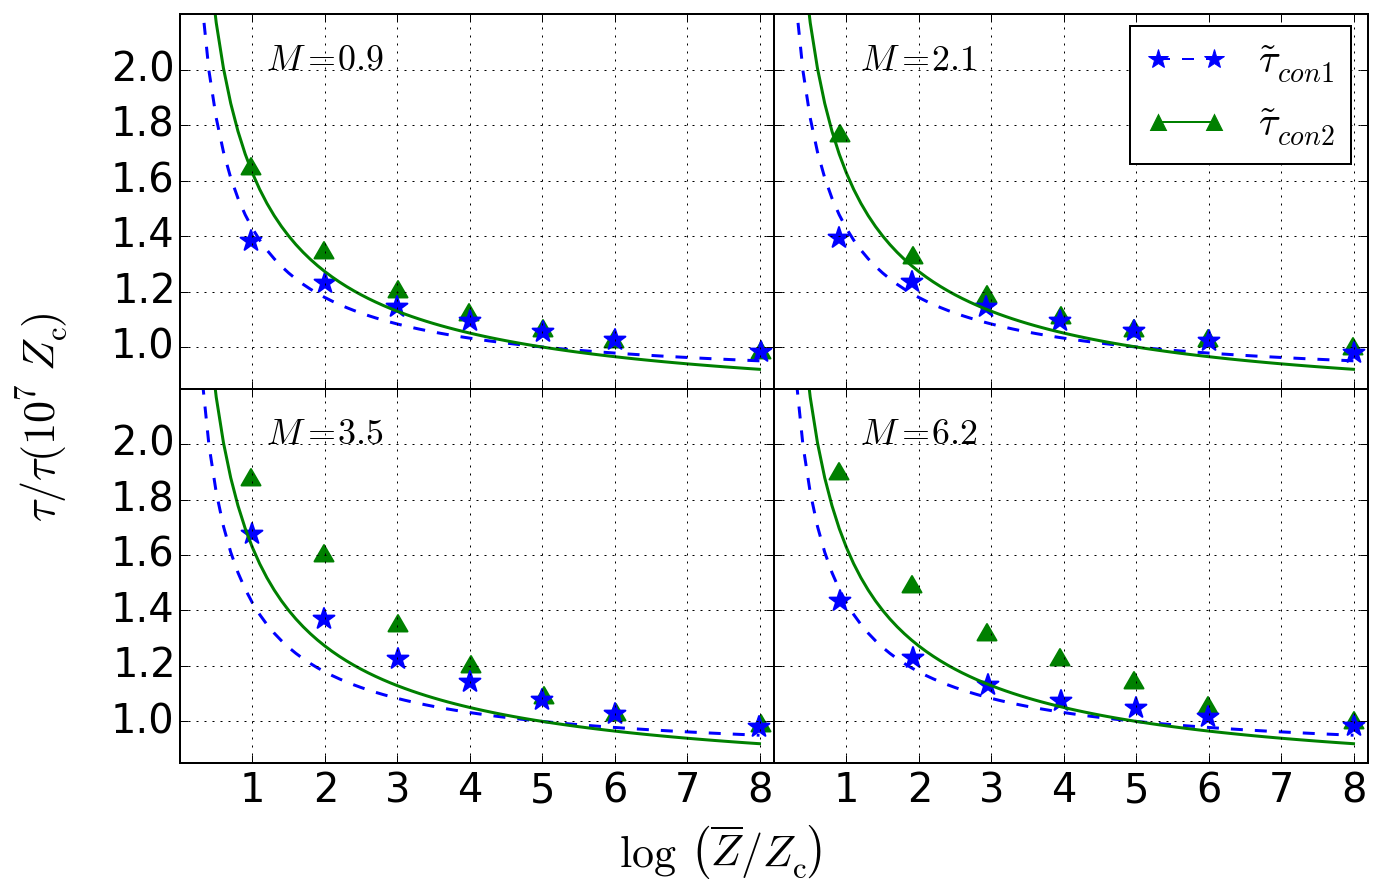

In [18]:
Zcrit = 1e-5

yt1m09=tau1v(10**zrange*Zcrit,0.9)/tau1v(1,0.9)
yt2m09=tau2v(10**zrange*Zcrit,0.9)/tau2v(1,0.9)
yt1m21=tau1v(10**zrange*Zcrit,2.1)/tau1v(1,2.1)
yt2m21=tau2v(10**zrange*Zcrit,2.1)/tau2v(1,2.1)
yt1m35=tau1v(10**zrange*Zcrit,3.5)/tau1v(1,3.5)
yt2m35=tau2v(10**zrange*Zcrit,3.5)/tau2v(1,3.5)
yt1m62=tau1v(10**zrange*Zcrit,6.2)/tau1v(1,6.2)
yt2m62=tau2v(10**zrange*Zcrit,6.2)/tau2v(1,6.2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

ytics = [1.0,1.3,1.7,2.0]
ytics = [1.0,1.2,1.4,1.6,1.8,2.0]
xtics = [1,2,3,4,5,6,7,8]
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp((ax1, ax2, ax3, ax4), xticks=xtics, #xticklabels=['a', 'b', 'c'],
        yticks=ytics)

plt.setp([a.axes.set_ylim([0.85,2.2]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.axes.set_xlim([0.,8.2]) for a in [ax1,ax2,ax3,ax4]])

ax1.scatter(m09t2[:,0],m09t2[:,1],s=120, c="g",marker=(3,1), edgecolor='g')
ax1.scatter(m09t1[:,0],m09t1[:,1],s=120, c="b",marker='*', edgecolor='b')
ax1.plot(zrange,yt1m09,lw=1.5,ls='--')
ax1.plot(zrange,yt2m09,lw=1.5)
ax1.grid()

ax2.scatter(m21t2[:,0],m21t2[:,1],s=120, c="g",marker=(3,1), edgecolor='g')
ax2.scatter(m21t1[:,0],m21t1[:,1],s=120, c="b",marker='*', edgecolor='b')
ax2.plot(zrange,yt1m21,lw=1.5,ls='--')
ax2.plot(zrange,yt2m21,lw=1.5)
ax2.grid()

ax3.scatter(m35t2[:,0],m35t2[:,1],s=120, c="g",marker=(3,1), edgecolor='g')
ax3.scatter(m35t1[:,0],m35t1[:,1],s=120, c="b",marker='*', edgecolor='b')
ax3.plot(zrange,yt1m35,lw=1.5,ls='--')
ax3.plot(zrange,yt2m35,lw=1.5)
ax3.grid()

ax4.scatter(m62t2[:,0],m62t2[:,1],s=120, c="g",marker=(3,1), edgecolor='g')
ax4.scatter(m62t1[:,0],m62t1[:,1],s=120, c="b",marker='*', edgecolor='b')
ax4.plot(zrange,yt1m62,lw=1.5,ls='--')
ax4.plot(zrange,yt2m62,lw=1.5)
ax4.grid()

fig.text(0.5, 0.01, r"${\rm log}\, \left(\overline{Z}/Z_{\rm c}\right)$", ha='center',fontsize=22)
fig.text(0.01, 0.4, r'$\tau/\tau(10^7 Z_{\rm{c}})$', va='center', rotation='vertical',fontsize=22)

b_line = mlines.Line2D([], [], color='blue', marker='*', mec='b',linestyle='--',
                          markersize=10, label=r'$\tilde \tau_{con1}$')
g_line = mlines.Line2D([], [], color='g', marker='^', mec='g',
                          markersize=8, label=r'$\tilde \tau_{con2}$')

ax2.legend(handles=[b_line,g_line],loc=(0.6,0.6), fontsize=20)
# ax2.legend([r'$\tilde \tau_{con1}$',r'$\tilde \tau_{\rm{con2}}$'],loc=(0.65,0.65), fontsize=18)
plt.setp([a.annotate("$M=%.1f$"%m,
            xy=(1,1), xycoords='data',horizontalalignment='center',
            xytext=(2,2), textcoords='data',size=18,
            ) for a, m in zip([ax1,ax2,ax3,ax4],[0.9,2.1,3.5,6.2])], visible=True)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.95, top=.75, wspace=.0, hspace=.0)

#plt.savefig("tauPlot.pdf",bbox_inches='tight')

# Using our Z_crit

In [30]:
Zcrit = 1e-5

yt1m09=tau1v(10**zrange*Zcrit,0.9)/tau1v(1,0.9)
yt2m09=tau2v(10**zrange*Zcrit,0.9)/tau2v(1,0.9)
yt1m21=tau1v(10**zrange*Zcrit,2.1)/tau1v(1,2.1)
yt2m21=tau2v(10**zrange*Zcrit,2.1)/tau2v(1,2.1)
yt1m35=tau1v(10**zrange*Zcrit,3.5)/tau1v(1,3.5)
yt2m35=tau2v(10**zrange*Zcrit,3.5)/tau2v(1,3.5)
yt1m62=tau1v(10**zrange*Zcrit,6.2)/tau1v(1,6.2)
yt2m62=tau2v(10**zrange*Zcrit,6.2)/tau2v(1,6.2)

/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


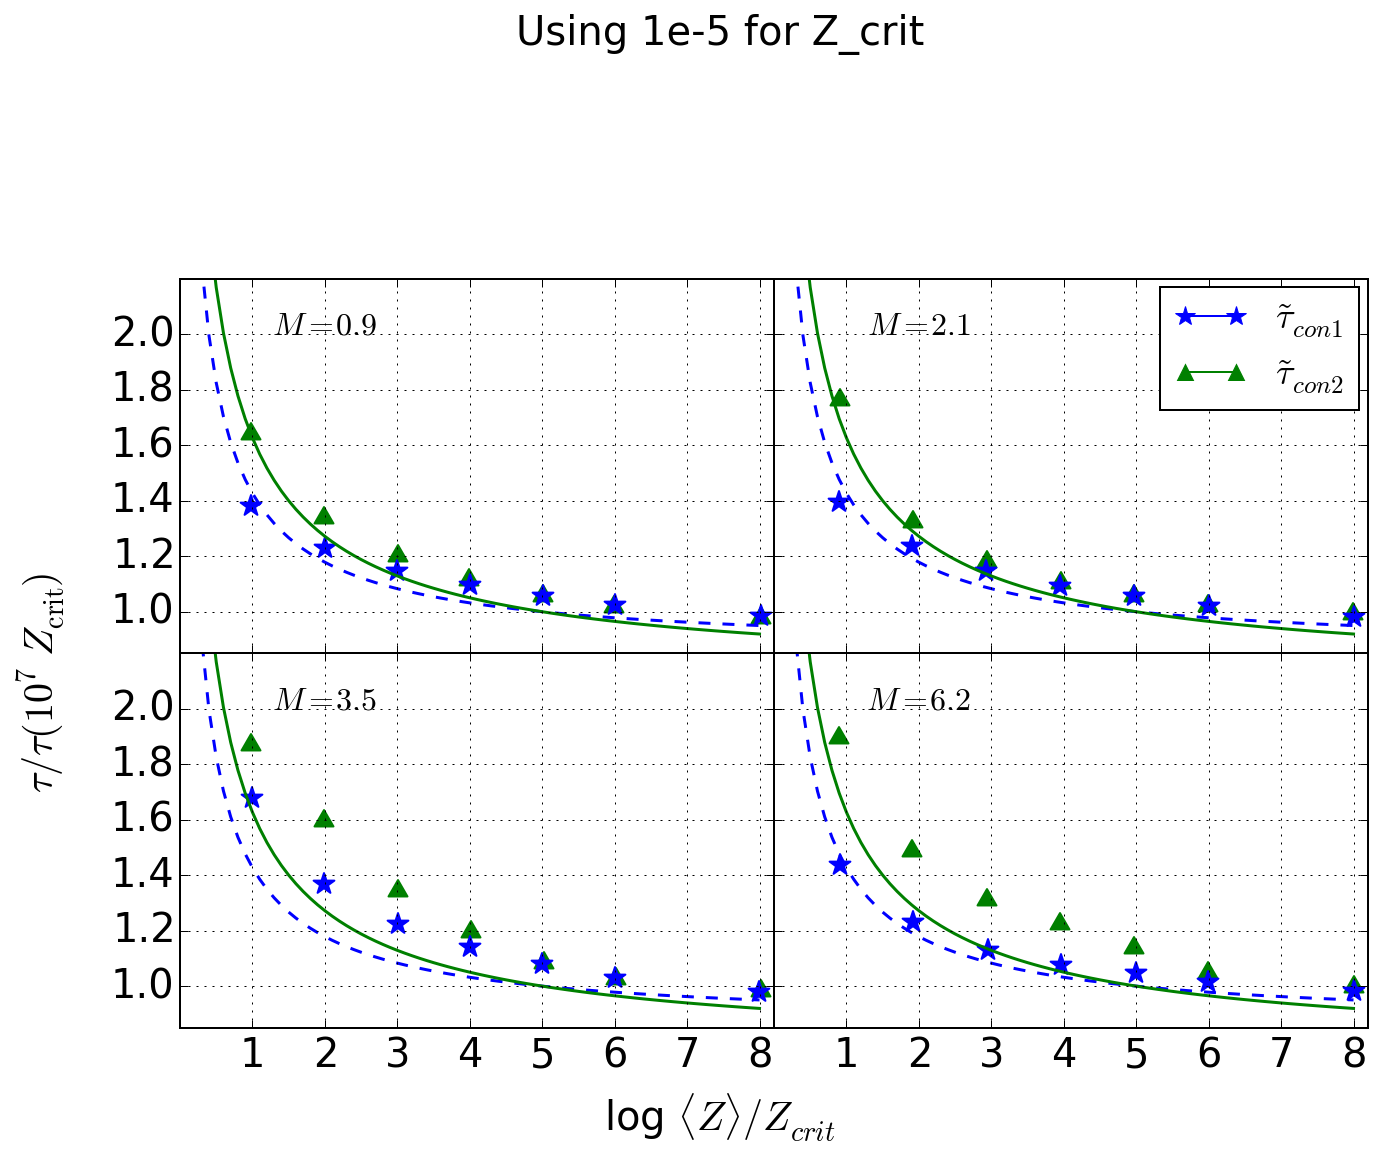

In [32]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

fig.suptitle('Using 1e-5 for Z_crit')
ytics = [1.0,1.3,1.7,2.0]
ytics = [1.0,1.2,1.4,1.6,1.8,2.0]
xtics = [1,2,3,4,5,6,7,8]
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp((ax1, ax2, ax3, ax4), xticks=xtics, #xticklabels=['a', 'b', 'c'],
        yticks=ytics)

plt.setp([a.axes.set_ylim([0.85,2.2]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.axes.set_xlim([0.,8.2]) for a in [ax1,ax2,ax3,ax4]])

ax1.scatter(m09t2[:,0],m09t2[:,1],s=120, c="g",marker=(3,1), edgecolor='g')
ax1.scatter(m09t1[:,0],m09t1[:,1],s=120, c="b",marker='*', edgecolor='b')
ax1.plot(zrange,yt1m09,lw=1.5,ls='--')
ax1.plot(zrange,yt2m09,lw=1.5)
ax1.grid()

ax2.scatter(m21t2[:,0],m21t2[:,1],s=120, c="g",marker=(3,1), edgecolor='g')
ax2.scatter(m21t1[:,0],m21t1[:,1],s=120, c="b",marker='*', edgecolor='b')
ax2.plot(zrange,yt1m21,lw=1.5,ls='--')
ax2.plot(zrange,yt2m21,lw=1.5)
ax2.grid()

ax3.scatter(m35t2[:,0],m35t2[:,1],s=120, c="g",marker=(3,1), edgecolor='g')
ax3.scatter(m35t1[:,0],m35t1[:,1],s=120, c="b",marker='*', edgecolor='b')
ax3.plot(zrange,yt1m35,lw=1.5,ls='--')
ax3.plot(zrange,yt2m35,lw=1.5)
ax3.grid()

ax4.scatter(m62t2[:,0],m62t2[:,1],s=120, c="g",marker=(3,1), edgecolor='g')
ax4.scatter(m62t1[:,0],m62t1[:,1],s=120, c="b",marker='*', edgecolor='b')
ax4.plot(zrange,yt1m62,lw=1.5,ls='--')
ax4.plot(zrange,yt2m62,lw=1.5)
ax4.grid()

fig.text(0.5, 0.01, r"log $\langle Z \rangle/Z_{crit}$", ha='center')
fig.text(0.01, 0.4, r'$\tau/\tau(10^7 Z_{\rm{crit}})$', va='center', rotation='vertical')

b_line = mlines.Line2D([], [], color='blue', marker='*', mec='b',
                          markersize=10, label=r'$\tilde \tau_{con1}$')
g_line = mlines.Line2D([], [], color='g', marker='^', mec='g',
                          markersize=8, label=r'$\tilde \tau_{con2}$')

ax2.legend(handles=[b_line,g_line],loc=(0.65,0.65), fontsize=18)
# ax2.legend([r'$\tilde \tau_{con1}$',r'$\tilde \tau_{\rm{con2}}$'],loc=(0.65,0.65), fontsize=18)
plt.setp([a.annotate("$M=%.1f$"%m,
            xy=(1,1), xycoords='data',horizontalalignment='center',
            xytext=(2,2), textcoords='data',size=16,
            ) for a, m in zip([ax1,ax2,ax3,ax4],[0.9,2.1,3.5,6.2])], visible=True)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.95, top=.75, wspace=.0, hspace=.0)

# plt.savefig("tauPlot.pdf",bbox_inches='tight')

# Cooling

In [10]:
n1 = np.array([[2.777, -25.377],
   [2.892, -24.713],
   [3.002, -24.212],
   [3.149, -23.615],
   [3.300, -23.073],
   [3.478, -22.555],
   [3.650, -22.089],
   [3.773, -21.785],
   [3.887, -21.537],
   [3.996, -21.340],
   [4.141, -21.087],
   [4.293, -20.882],
   [4.472, -20.693],
   [4.647, -20.612]])
n100 = np.array([[2.776, -23.564],
   [2.894, -22.958],
   [2.993, -22.460],
   [3.142, -21.830],
   [3.298, -21.241],
   [3.471, -20.662],
   [3.651, -20.144],
   [3.774, -19.839],
   [3.889, -19.586],
   [3.997, -19.356],
   [4.143, -19.095],
   [4.297, -18.906],
   [4.470, -18.751],
   [4.641, -18.660]])
n1e4 = np.array([[2.777, -22.284],
   [2.888, -21.709],
   [2.991, -21.184],
   [3.144, -20.457],
   [3.298, -19.797],
   [3.481, -19.142],
   [3.651, -18.640],
   [3.780, -18.354],
   [3.893, -18.141],
   [3.999, -18.018],
   [4.141, -17.872],
   [4.293, -17.832],
   [4.469, -17.816],
   [4.645, -17.816]])
n1e8 = np.array([[2.778, -21.721],
   [2.888, -21.125],
   [2.994, -20.575],
   [3.143, -19.878],
   [3.296, -19.295],
   [3.471, -18.806],
   [3.646, -18.436],
   [3.776, -18.198],
   [3.890, -18.024],
   [3.994, -17.909],
   [4.141, -17.810],
   [4.294, -17.761],
   [4.468, -17.761],
   [4.643, -17.761]])


In [11]:
def n1fit(x):
    return (-49.5957 + 31.0852 * math.log(x) - 5.67386 * math.log(x)**2 - 1.47381 * math.log(x)**3)
n1fitv=np.vectorize(n1fit)

def n100fit(x):
    return (-34.8118 - 1.61615 * math.log(x) + 21.2644 * math.log(x)**2 - 8.69699 * math.log(x)**3)
n100fitv=np.vectorize(n100fit)

def n1e4fit(x):
    return (-24.3222 - 31.2618 * math.log(x) + 51.2746 * math.log(x)**2 - 18.3506 * math.log(x)**3)
n1e4fitv=np.vectorize(n1e4fit)

def n1e8fit(x):
    return (-60.6165 + 59.4566 * math.log(x) - 21.7646 * math.log(x)**2 + 0.789041 * math.log(x)**3)
n1e8fitv=np.vectorize(n1e8fit)


In [12]:
xrange=np.linspace(2.5,5.0,10)

In [13]:
n1fitv([2,3,4]),n100fitv([2,3,4])

(array([-31.26591946, -24.24740303, -21.33307557]),
 array([-28.61179681, -22.45421555, -19.3565759 ]))

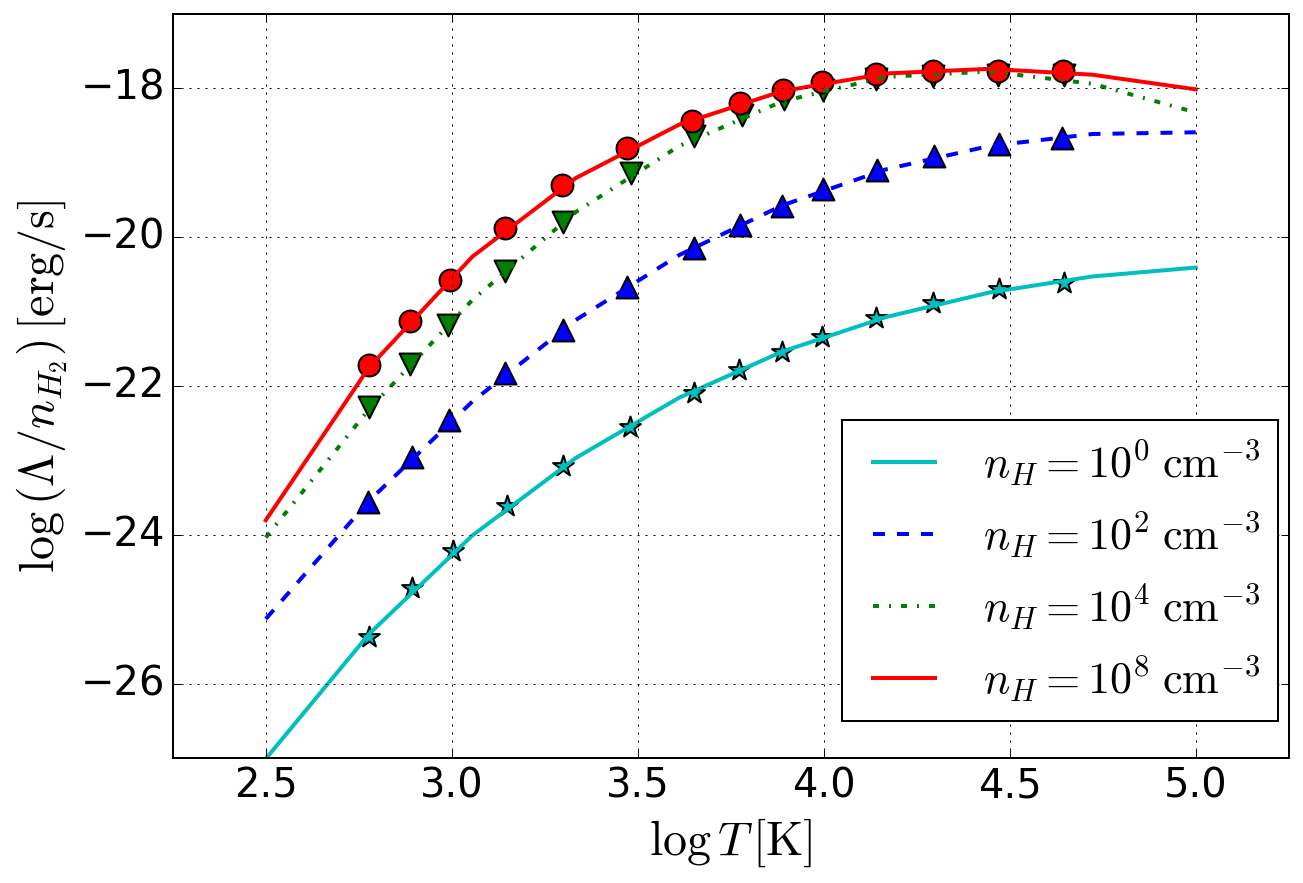

In [24]:
cool = plt.axes()
cool.set_aspect(0.2)
cool.plot(xrange, n1fitv(xrange), c="c", ls='-', lw=2)
cool.plot(xrange, n100fitv(xrange), c="b", ls='--', lw=2)
cool.plot(xrange, n1e4fitv(xrange), c="g",ls='-.', lw=2)
cool.plot(xrange, n1e8fitv(xrange), c="r",ls='-', lw=2)

cool.scatter(n1[:,0],n1[:,1],s=120, c="c",marker='*')
cool.scatter(n100[:,0],n100[:,1],s=120, c="b",marker='^')
cool.scatter(n1e4[:,0],n1e4[:,1],s=120, c="g",marker='v')
cool.scatter(n1e8[:,0],n1e8[:,1],s=120, c="r",marker='o')

cool.grid()
cool.axes.set_ylim([-27,-17])
cool.axes.set_xlim([2.25,5.25])
cool.set_xlabel(r"${\rm log}\, T\, [{\rmK}]$",fontsize=24)
cool.set_ylabel(r'${\rm log}\, (\Lambda/n_{H_{2}})\, [{\rm erg/s}]$',fontsize=24)
cool.legend([r'$n_{H} = 10^{0}\; {\rm cm}^{-3}$',
             r'$n_{H} = 10^{2}\; {\rm cm}^{-3}$',
             r'$n_{H} = 10^{4}\; {\rm cm}^{-3}$',
             r'$n_{H} = 10^{8}\; {\rm cm}^{-3}$'],loc=(0.6,0.05), fontsize=22 )

plt.savefig("cooling.pdf",bbox_inches='tight')